In [60]:
import sys

import networkx as nx
import igraph as ig
from networkx.generators.community import LFR_benchmark_graph

import numpy as np
import time

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15

#sys.path.append("/home/oriol/Documents/Trento/JacobianGeometry/Code/Dynamics_v2/")
#sys.path.append("/Users/giacomobarzon/Desktop/jacobian_geometry/Code_8thJune/Dynamics_v2/")
sys.path.append("/home/barzon/Network_geometry/Code_8thJune/Dynamics_v2/")

import CommonFunctions as cf
import plotter

import importlib
importlib.reload(cf)
importlib.reload(plotter)

<module 'plotter' from '/home/barzon/Network_geometry/Code_8thJune/Dynamics_v2/plotter.py'>

# Graph generation

In [2]:
N = 60
mean_deg = 8.

In [3]:
num_groups = 6; nodes_per_group = 10; kave = mean_deg; k_out = 0.2#kave is local average
k_in = kave - k_out
p_in = k_in/nodes_per_group
p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
print('Block model probs: in %f - out %f' % (p_in, p_out))

G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

while nx.is_connected(G_gn) == 0:
    print('The network should be in a single component. New trial!')
    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

infoG_gn = ['GN',k_out]

print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))

Block model probs: in 0.780000 - out 0.004000
The network should be in a single component. New trial!
Mean degree 7.5


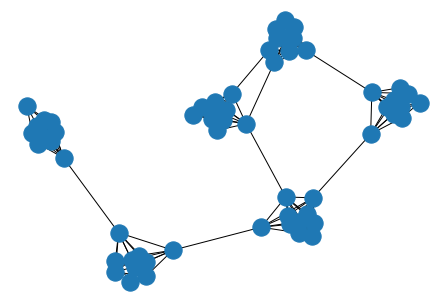

In [4]:
nx.draw(G_gn)

# Diffusion - Jacobian distance

In [21]:
dynamics_list = ['Mutualistic', 'Biochemical', 'Population', 'Regulatory','Epidemics','Synchronization', 'Neuronal', 'NoisyVM']

dynamics_short = ['MUT', 'BIO', 'POP', 'REG', 'EPI', 'SYN', 'NEU', 'NVM', 'DIF']

#dynamics_list = ['Regulatory','Epidemics','Synchronization', 'Neuronal', 'NoisyVM']

def Simu(G, infoG):
    """
    Inputs: dynamics (any from  dynamics_list = ['Mutualistic', 'Biochemical', 'Population', 'Regulatory',
                                                 'Epidemics','Synchronization', 'Neuronal', 'NoisyVM'])
            Network topology G
            infoG (list): Info about the network. infoG[0] = network_type; infoG[i>0] = parameters
    """
    print('-------- GRAPH DISTANCES --------')
    start_time = time.time()
    
    num_nodes = G.number_of_nodes()
    #num_time_points = 50 # small to decrease computational load
    times = np.linspace(0, num_nodes, num = num_nodes+1) #time to find the steady state    
    times_perturbation = np.linspace(0, num_nodes, num = num_nodes+1) #times at which we look how the perturbation evolves
    
    if nx.is_connected(G) == 0:
        raise ValueError('The network should be in a single component. Exit!')
    
    res = []
    
    for dynamics in dynamics_list:
    
        ### JACOBIAN
        print('[*] JACOBIAN DISTANCE - '+str(dynamics))
        
        #Integration to get the steady state
        print('Integration up to steady state...')
        initial_state = np.random.random(len(G.nodes()))   
        SteadyState_ref, char_time = cf.Numerical_Integration(G, dynamics, initial_state, times = times, fixed_node = 1e+6, show = 1)
        SteadyState_ref = SteadyState_ref[-1]
        
        if char_time == np.inf:
            char_time = 100**(1/1.7)
        print('Char time: ', char_time)
            

        # analytical expression of Jacobian
        print('Evaluating jacobian distance...')
        d_jac = cf.Jacobian(G, dynamics, SteadyState_ref, times_perturbation, return_snapshot=True)
        res.append(d_jac)
        
    ### DIFFUSION
    print('[*] DIFFUSION DISTANCE')
    print('Evaluating diffusion distance...')
    d_diff = cf.Laplacian(nx.to_numpy_array(G), times_perturbation, norm=True, return_snapshot=True)
    
    res.append(d_diff)
    
    return res

-------- GRAPH DISTANCES --------
[*] JACOBIAN DISTANCE - Mutualistic
Integration up to steady state...


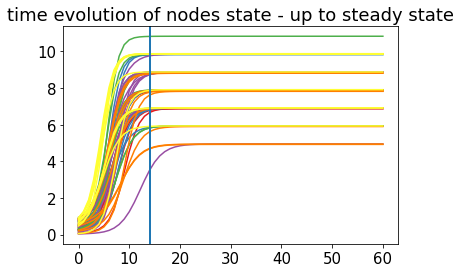

Char time:  14.0
Evaluating jacobian distance...
largest eig: 1.0839966426141507
eigs sum: -47.32197788679068


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Biochemical
Integration up to steady state...


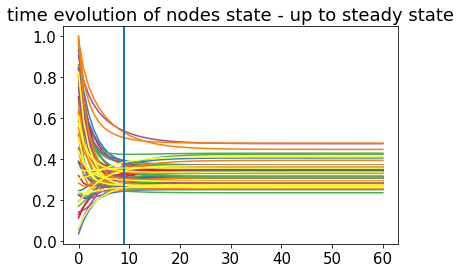

Char time:  9.0
Evaluating jacobian distance...
largest eig: 0.5678144731956039
eigs sum: -19.106485276741072


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Population
Integration up to steady state...


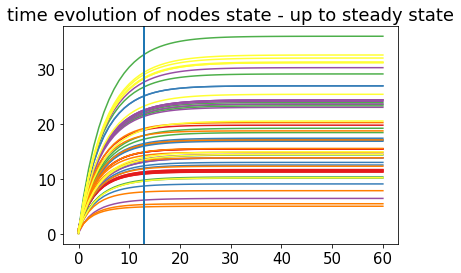

Char time:  13.0
Evaluating jacobian distance...
largest eig: 0.6969343781408527
eigs sum: -22.5944222842321


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Regulatory
Integration up to steady state...


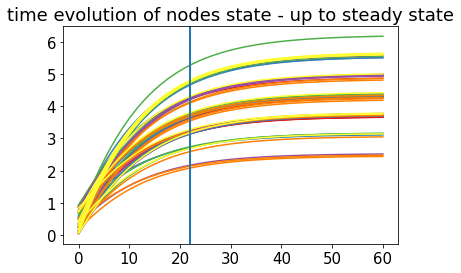

Char time:  22.0
Evaluating jacobian distance...
largest eig: 0.10838641869208082
eigs sum: -6.0


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Epidemics
Integration up to steady state...


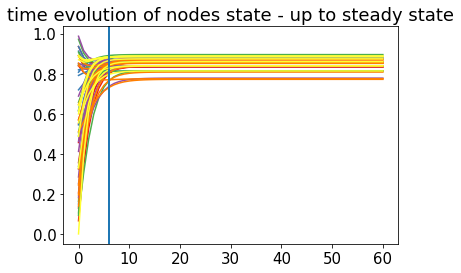

Char time:  6.0
Evaluating jacobian distance...
largest eig: 0.9607162408093072
eigs sum: -42.03908530606375


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Synchronization
Integration up to steady state...


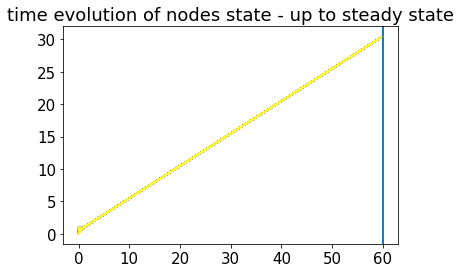

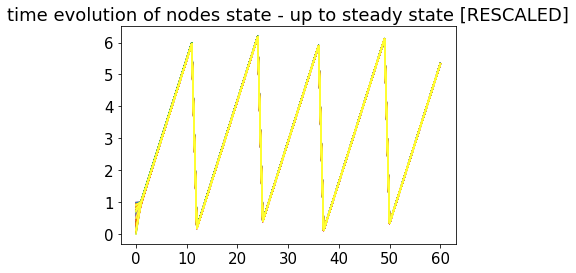

Char time:  60.0
Evaluating jacobian distance...
largest eig: 5.679407500317018
eigs sum: -209.99998494847586


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Neuronal
Integration up to steady state...


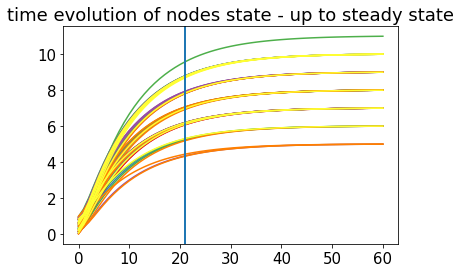

Char time:  21.0
Evaluating jacobian distance...
largest eig: 0.10003052415311643
eigs sum: -5.999925497602101


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - NoisyVM
Integration up to steady state...


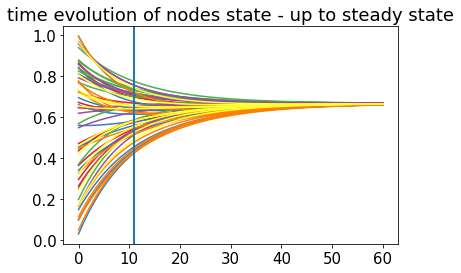

Char time:  11.0
Evaluating jacobian distance...
largest eig: 0.11421682235769626
eigs sum: -6.0


  0%|          | 0/61 [00:00<?, ?it/s]

[*] DIFFUSION DISTANCE
Evaluating diffusion distance...
largest eig: 1.5381189814668814
eigs sum: 59.999999999999986


  0%|          | 0/61 [00:00<?, ?it/s]

In [22]:
results = Simu(G_gn, infoG_gn)

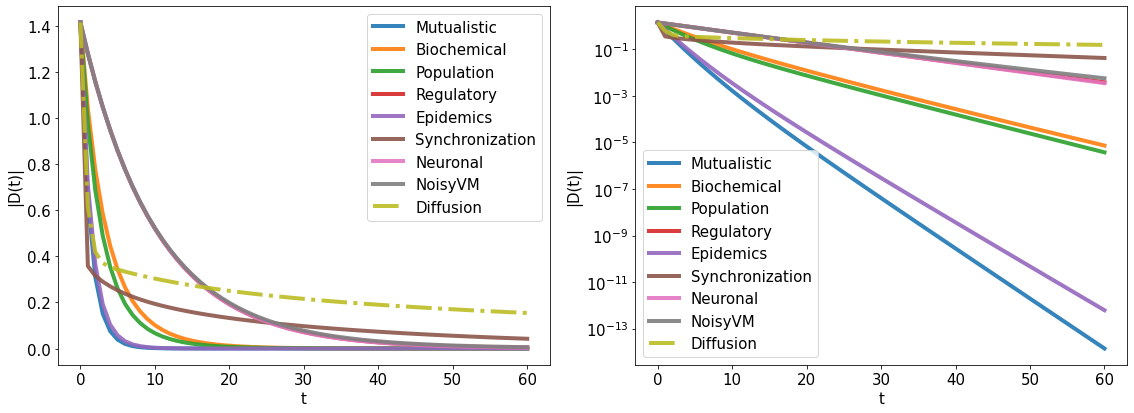

In [153]:
plt.figure(figsize=(16,6))

lw = 4.

plt.subplot(1,2,1)

for i, res in enumerate(results):
    if i==len(dynamics_list):
        plt.plot(res[0], '-.', label='Diffusion', lw=lw, alpha=0.9)
    else:
        plt.plot(res[0], label=dynamics_list[i], lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('|D(t)|')
#plt.yscale('log')
plt.legend()

plt.subplot(1,2,2)

for i, res in enumerate(results):
    if i==len(dynamics_list):
        plt.plot(res[0], '-.', label='Diffusion', lw=lw, alpha=0.9)
    else:
        plt.plot(res[0], label=dynamics_list[i], lw=lw, alpha=0.9)

plt.xlabel('t')
plt.ylabel('|D(t)|')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

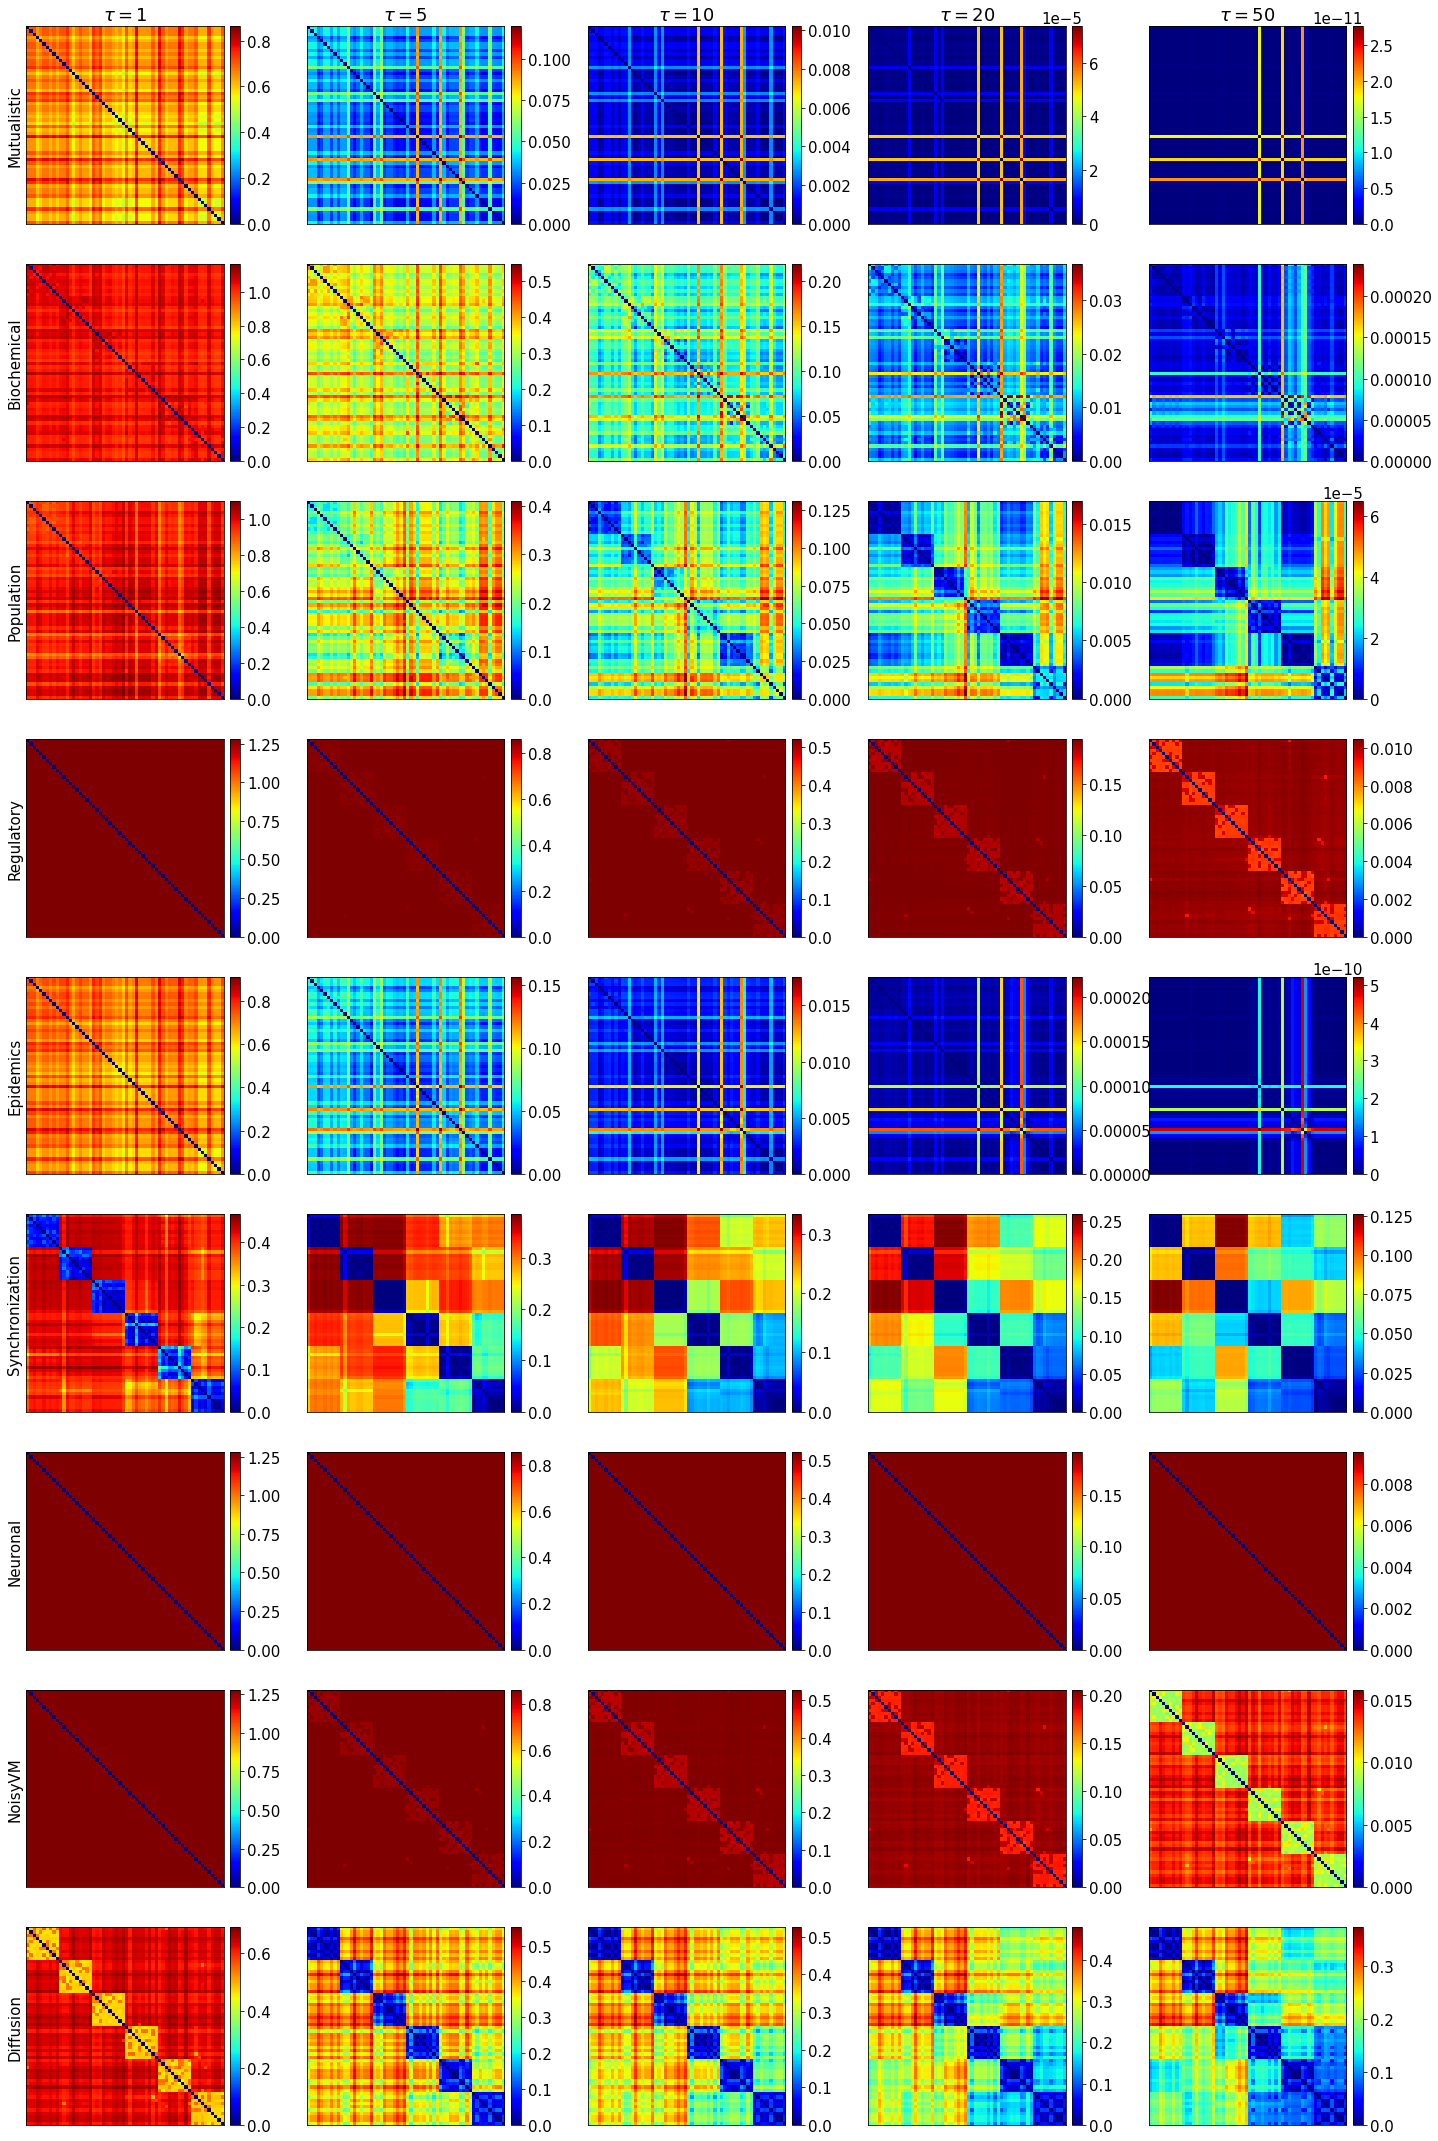

In [24]:
t_print = [1, 5, 10, 20, 50]

plt.figure(figsize=(20,30))

Y = len(t_print)
X = len(dynamics_list)+1

for i, t in enumerate(t_print):
    for j, res in enumerate(results):
        plt.subplot(X,Y, i+1 + j*Y)
    
        im = plt.imshow(res[1][t], cmap='jet')
    
        plt.colorbar(im,fraction=0.046, pad=0.03)
        plt.xticks([])
        plt.yticks([])
        if j==0:
            plt.title(r'$\tau = $'+str(t))
        if i==0:
            if j==X-1:
                plt.ylabel('Diffusion')
            else:
                plt.ylabel(dynamics_list[j])
                
#plt.subplots_adjust(wspace=0, hspace=-1.05)
plt.tight_layout()
plt.show()

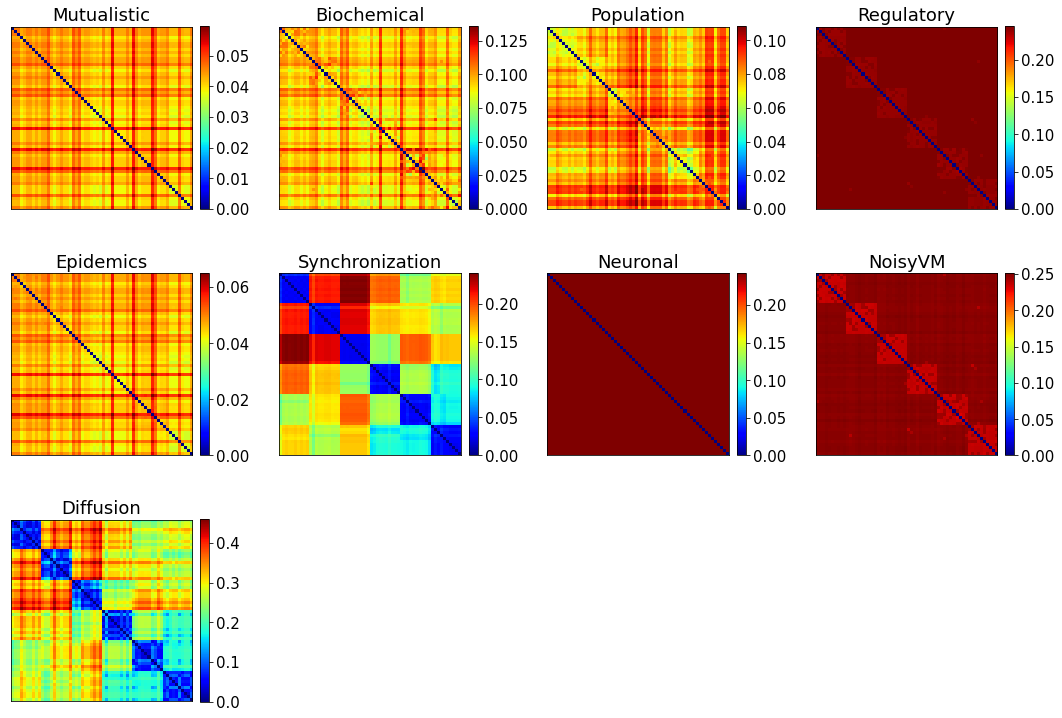

In [25]:
# Average distance matrix
plt.figure(figsize=(15,30))

for i, res in enumerate(results):

    plt.subplot(3,len(results)//2,i+1)
    
    im = plt.imshow(np.mean(res[1],axis=0), cmap='jet')
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.xticks([])
    plt.yticks([])
    
    if i==len(dynamics_list):
        plt.title('Diffusion')
    else:
        plt.title(dynamics_list[i])

plt.subplots_adjust(wspace=0, hspace=-1.23)
plt.tight_layout()
plt.show()

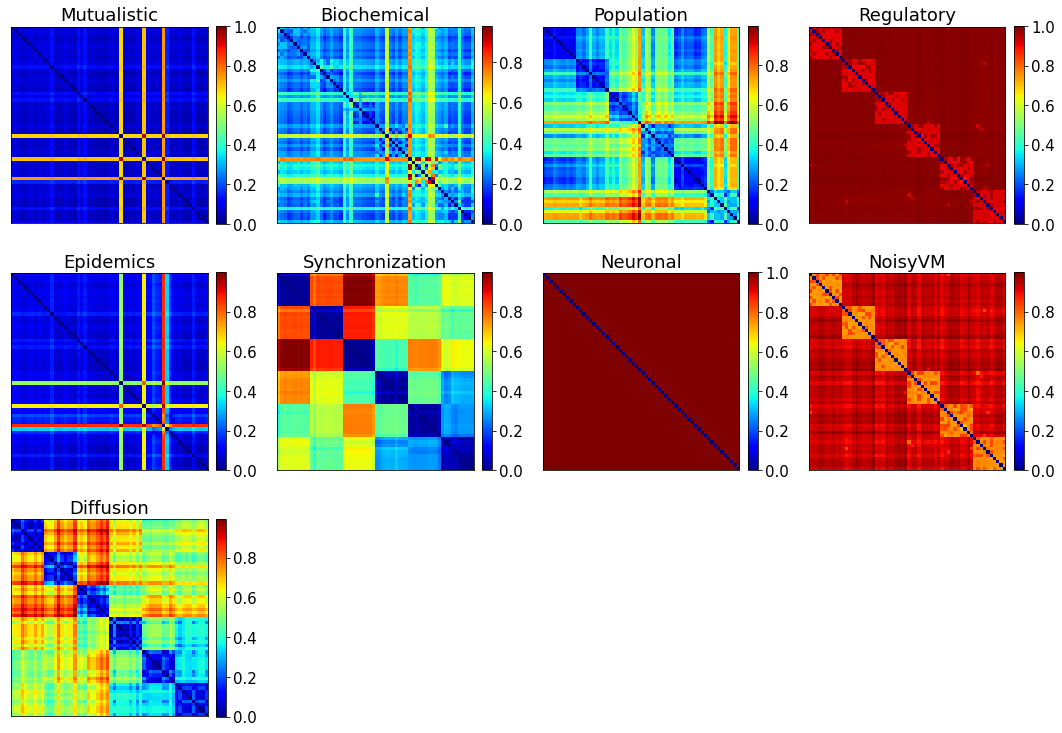

In [26]:
# Average normalize distance matrix
plt.figure(figsize=(15,30))

for i, res in enumerate(results):

    plt.subplot(3,len(results)//2,i+1)
    
    im = plt.imshow(get_average_matrix(res[1]), cmap='jet')
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.xticks([])
    plt.yticks([])
    
    if i==len(dynamics_list):
        plt.title('Diffusion')
    else:
        plt.title(dynamics_list[i])

plt.subplots_adjust(wspace=0, hspace=-1.23)
plt.tight_layout()
plt.show()

# Mantel test

https://github.com/jwcarr/mantel

In [67]:
import mantel
from matplotlib import cm
import copy

In [29]:
avg_dist = []
avg_dist_norm = []

for res in results:
    avg_dist.append(np.mean(res[1],axis=0))
    avg_dist_norm.append(get_average_matrix(res[1]))

In [145]:
corrs = np.zeros((len(dynamics_list)+1,len(dynamics_list)+1))

for i, matX in enumerate(avg_dist[:-1]):
    for j, matY in enumerate(avg_dist[i+1:]):
        #tmp = mantel.test(matX, matY, perms=10000, method='pearson', tail='upper')
        #print(tmp)
        corrs[i,i+j+1] = mantel.test(matX, matY, perms=10000, method='pearson', tail='upper')[0]

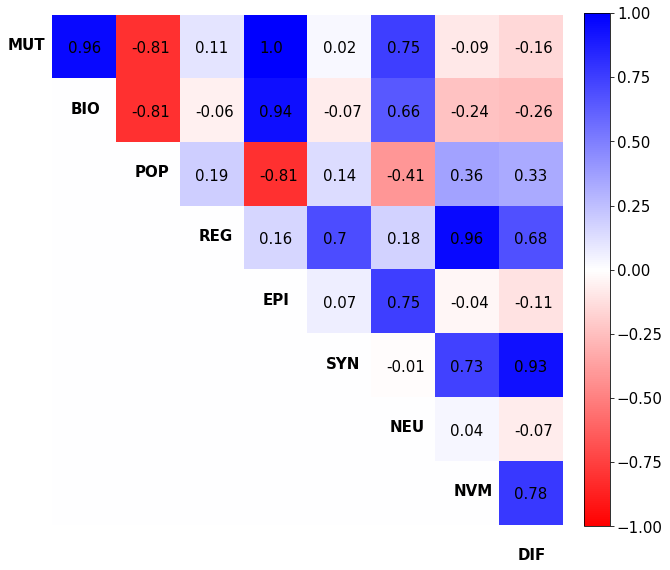

In [144]:
fig = plt.figure(figsize=(10,10))

corrs_mask = corrs[:-1]
corrs_mask = corrs_mask[:,1:]

cmap = cmap = copy.copy(cm.get_cmap("bwr_r"))
cmap.set_bad('w') # default value is 'k'

im = plt.imshow(corrs_mask, interpolation="nearest", cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.axis('off')

for i, name in enumerate(dynamics_short):
    plt.text(i-1.2, i+0.05, name, weight="bold")
    
for i in range(corrs_mask.shape[0]):
    for j in range(i, corrs_mask.shape[0]):
        plt.text(j-0.25, i+0.1, corrs_mask[i,j].round(decimals=2))

plt.show()

In [55]:
corrs_norm = np.zeros((len(dynamics_list)+1,len(dynamics_list)+1))

for i, matX in enumerate(avg_dist_norm[:-1]):
    for j, matY in enumerate(avg_dist_norm[i+1:]):
        corrs_norm[i,i+j+1] = mantel.test(matX, matY, perms=10000, method='pearson', tail='upper')[0]

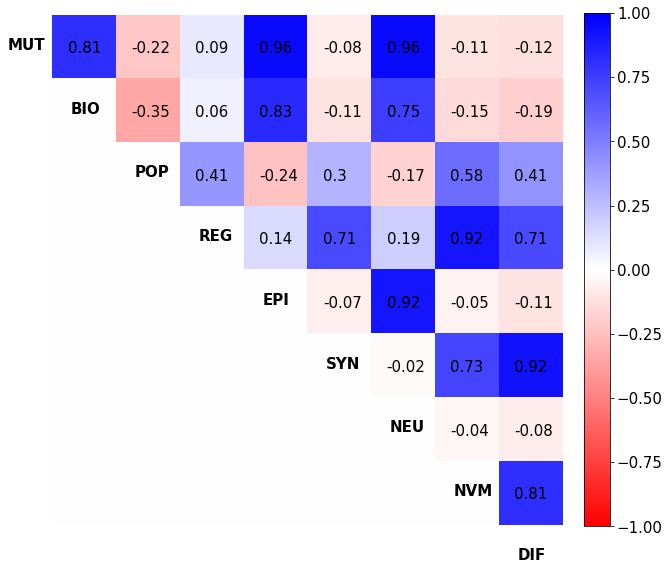

In [143]:
fig = plt.figure(figsize=(10,10))

corrs_mask = corrs_norm[:-1]
corrs_mask = corrs_mask[:,1:]

cmap = cmap = copy.copy(cm.get_cmap("bwr_r"))
cmap.set_bad('w') # default value is 'k'

im = plt.imshow(corrs_mask, interpolation="nearest", cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.axis('off')

for i, name in enumerate(dynamics_short):
    plt.text(i-1.2, i+0.05, name, weight="bold")
    
for i in range(corrs_mask.shape[0]):
    for j in range(i, corrs_mask.shape[0]):
        plt.text(j-0.25, i+0.1, corrs_mask[i,j].round(decimals=2))

plt.show()

# Varying parameters of dynamics

In [21]:
def Simu_params(G, infoG, dynamics, params):
    """
    Inputs: Network topology G
            infoG (list): Info about the network. infoG[0] = network_type; infoG[i>0] = parameters
            dynamic (any from  dynamics_list = ['Mutualistic', 'Biochemical', 'Population', 'Regulatory',
                                                 'Epidemics','Synchronization', 'Neuronal', 'NoisyVM'])
            kwargs: parameters of model
    """
    print('-------- GRAPH DISTANCES --------')
    start_time = time.time()
    
    num_nodes = G.number_of_nodes()
    #num_time_points = 50 # small to decrease computational load
    times = np.linspace(0, num_nodes, num = num_nodes+1) #time to find the steady state    
    times_perturbation = np.linspace(0, num_nodes, num = num_nodes+1) #times at which we look how the perturbation evolves
    
    if nx.is_connected(G) == 0:
        raise ValueError('The network should be in a single component. Exit!')
    
    res = []
    
    for param in params:
    
        ### JACOBIAN
        print('[*] JACOBIAN DISTANCE - '+str(dynamics)+' - PARAMS: '+str(param))
        
        #Integration to get the steady state
        print('Integration up to steady state...')
        initial_state = np.random.random(len(G.nodes()))   
        SteadyState_ref, char_time = cf.Numerical_Integration(G, dynamics, initial_state, times = times, fixed_node = 1e+6, show = 1, epsilon = 1, args = param)
        SteadyState_ref = SteadyState_ref[-1]
        
        if char_time == np.inf:
            char_time = 100**(1/1.7)
        print('Char time: ', char_time)
            
        # analytical expression of Jacobian
        print('Evaluating jacobian distance...')
        d_jac = cf.Jacobian(G, dynamics, SteadyState_ref, times_perturbation, norm = False, return_snapshot=True, args = param)
        res.append(d_jac)
    
    return res

## - Mutualistic

-------- GRAPH DISTANCES --------
[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0]
Integration up to steady state...


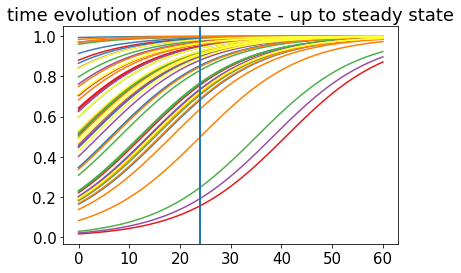

Char time:  24.0
Evaluating jacobian distance...
largest eig: 0.09999686228932048
eigs sum: -5.88870280076373


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.005]
Integration up to steady state...


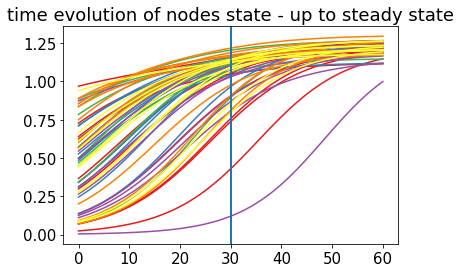

Char time:  30.0
Evaluating jacobian distance...
largest eig: 0.13229228435415336
eigs sum: -7.176143256878615


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.01]
Integration up to steady state...


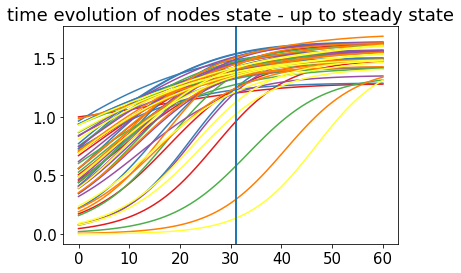

Char time:  31.0
Evaluating jacobian distance...
largest eig: 0.17262613610363967
eigs sum: -8.996360627342874


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.02]
Integration up to steady state...


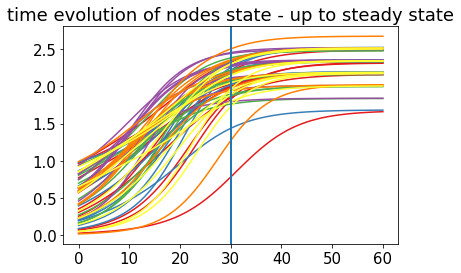

Char time:  30.0
Evaluating jacobian distance...
largest eig: 0.2726920350287611
eigs sum: -13.524040867783487


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.05]
Integration up to steady state...


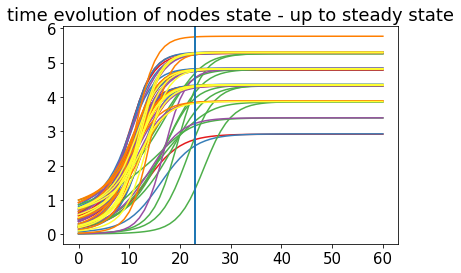

Char time:  23.0
Evaluating jacobian distance...
largest eig: 0.5790968879977779
eigs sum: -27.472776364802677


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.1]
Integration up to steady state...


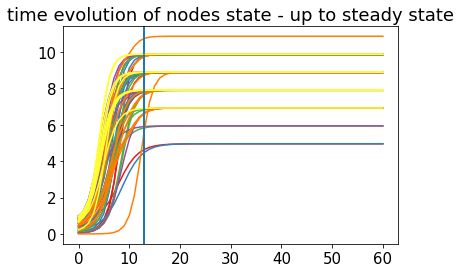

Char time:  13.0
Evaluating jacobian distance...
largest eig: 1.0861952559511938
eigs sum: -50.36027712570013


  0%|          | 0/61 [00:00<?, ?it/s]

In [73]:
params = [[0.1, 0],
          [0.1, 0.005],
          [0.1, 0.01],
          [0.1, 0.02],
          [0.1, 0.05],
          [0.1, 0.1]]

string_params = ['R = 0', 'R = 0.005', 'R = 0.01', 'R = 0.02', 'R = 0.05', 'R = 0.1']

dynamics = 'Mutualistic'

res_params = Simu_params(G_gn, infoG_gn, dynamics, params)

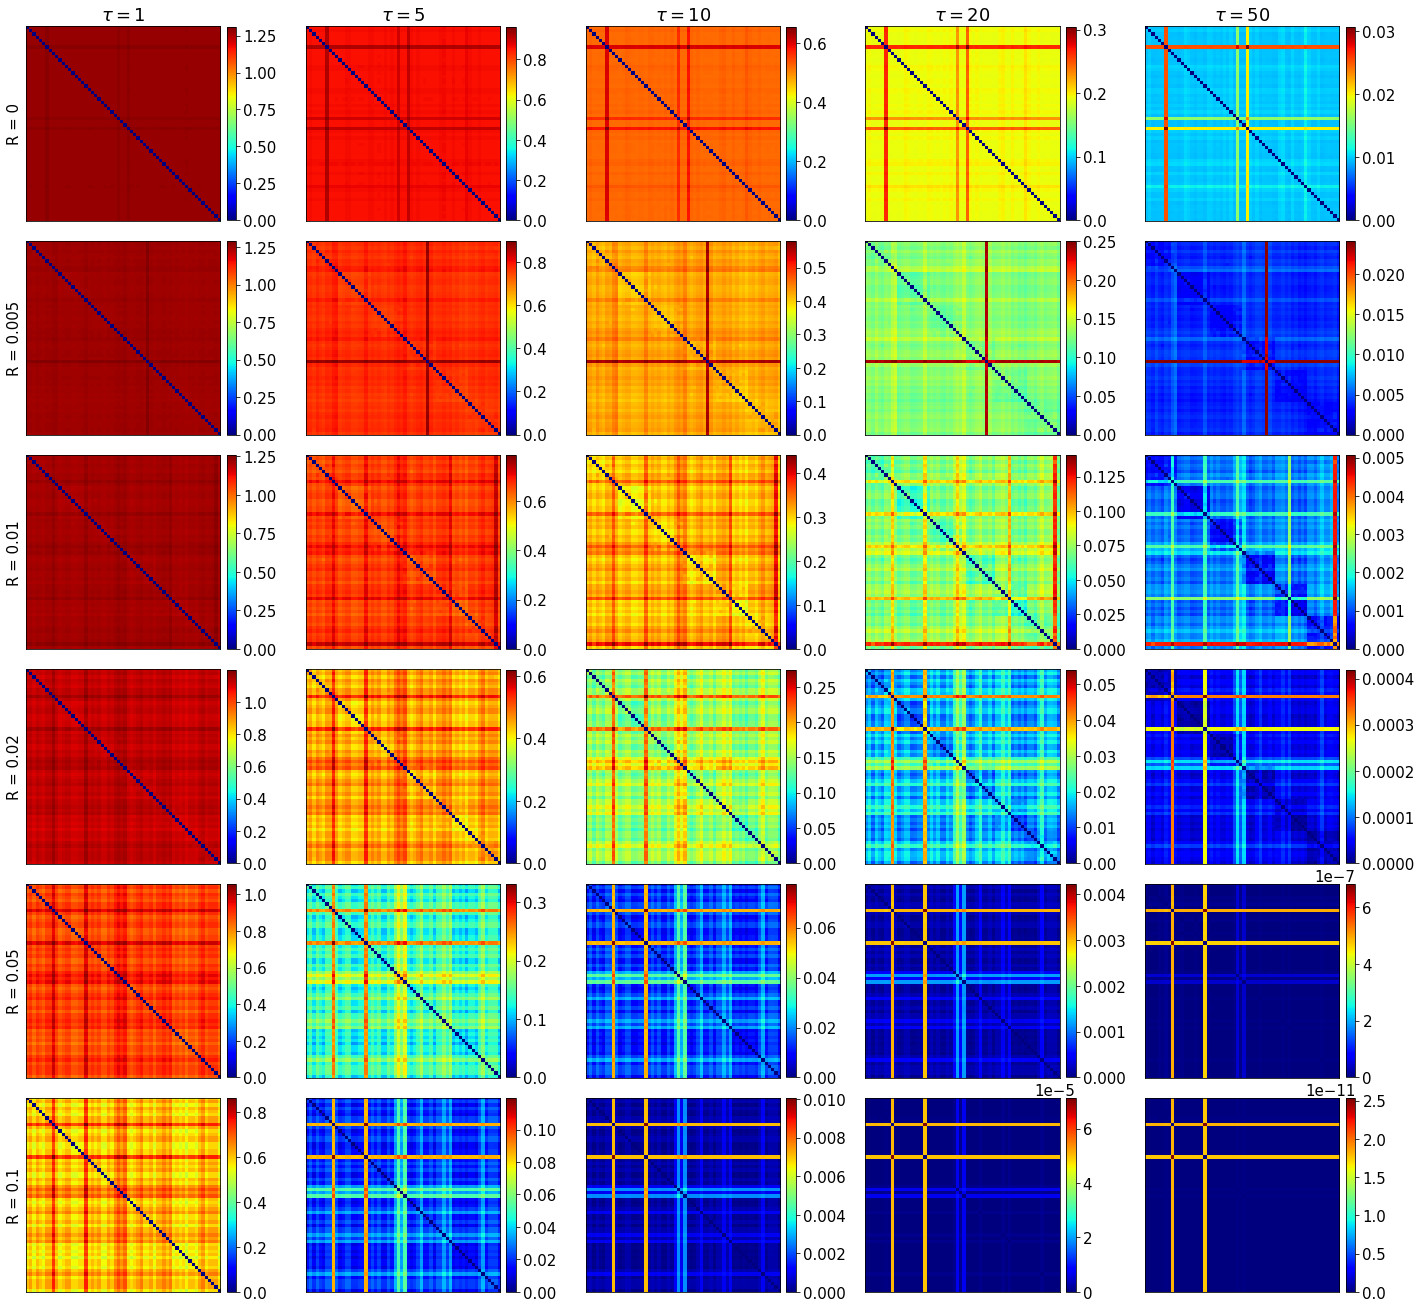

In [74]:
plotter.plot_dist_matrix_evol([tmp[1] for tmp in res_params], string_params, hspace=-0.9)

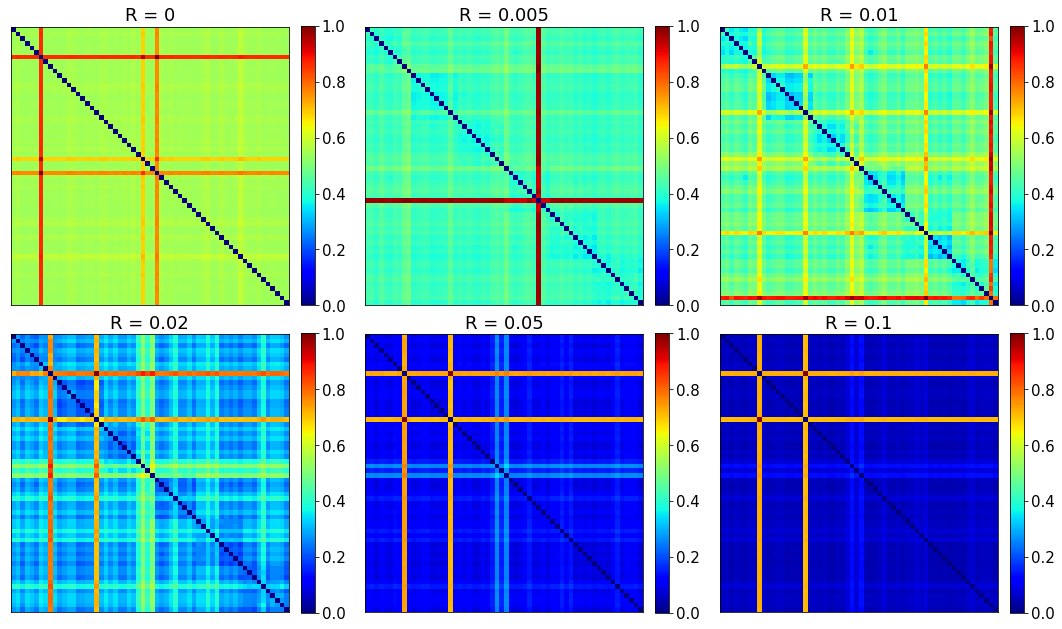

In [75]:
plotter.plot_average_dist_matrix([tmp[1] for tmp in res_params], string_params, hspace=-1.2)

-------- GRAPH DISTANCES --------
[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.0, 0.02]
Integration up to steady state...


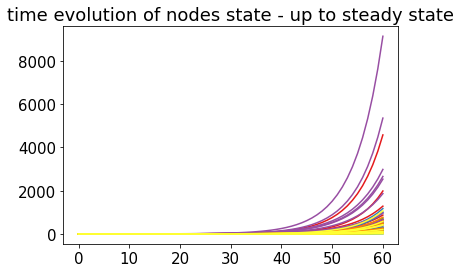

Char time:  15.013107289081734
Evaluating jacobian distance...
largest eig: 0.19997682037561054
eigs sum: 8.997573333793797


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.01, 0.02]
Integration up to steady state...


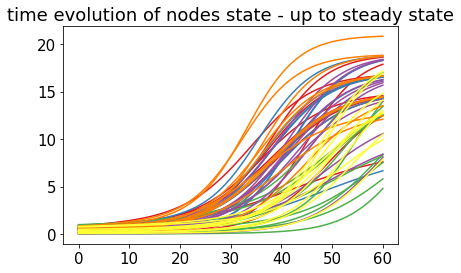

Char time:  15.013107289081734
Evaluating jacobian distance...
largest eig: 0.2072840962258255
eigs sum: -7.2191423374826265


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.02, 0.02]
Integration up to steady state...


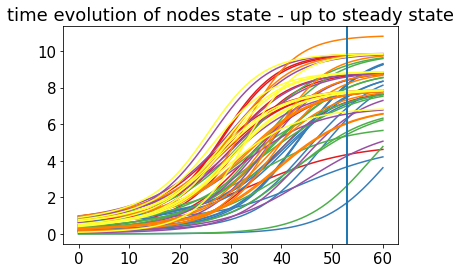

Char time:  53.0
Evaluating jacobian distance...
largest eig: 0.21539118367887694
eigs sum: -9.214770456197874


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.05, 0.02]
Integration up to steady state...


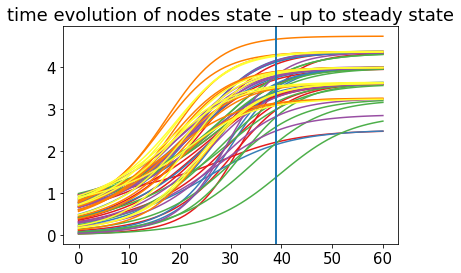

Char time:  39.0
Evaluating jacobian distance...
largest eig: 0.23832584730702314
eigs sum: -11.335941204682225


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.1, 0.02]
Integration up to steady state...


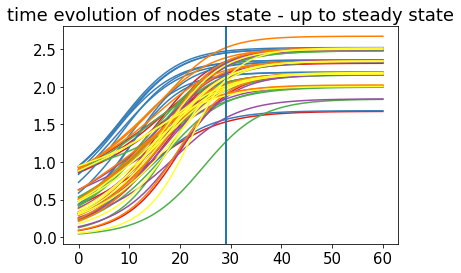

Char time:  29.0
Evaluating jacobian distance...
largest eig: 0.2727636198753036
eigs sum: -13.529707279528099


  0%|          | 0/61 [00:00<?, ?it/s]

[*] JACOBIAN DISTANCE - Mutualistic - PARAMS: [0.2, 0.02]
Integration up to steady state...


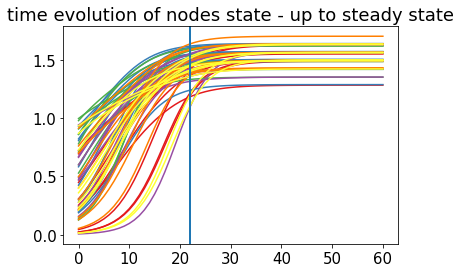

Char time:  22.0
Evaluating jacobian distance...
largest eig: 0.3512281200186512
eigs sum: -18.32492157032564


  0%|          | 0/61 [00:00<?, ?it/s]

In [76]:
params = [[0.0, 0.02],
          [0.01, 0.02],
          [0.02, 0.02],
          [0.05, 0.02],
          [0.1, 0.02],
          [0.2, 0.02]]

string_params = ['B = 0', 'B = 0.01', 'B = 0.02', 'B = 0.05', 'B = 0.1', 'B = 0.2']

dynamics = 'Mutualistic'

res_params = Simu_params(G_gn, infoG_gn, dynamics, params)

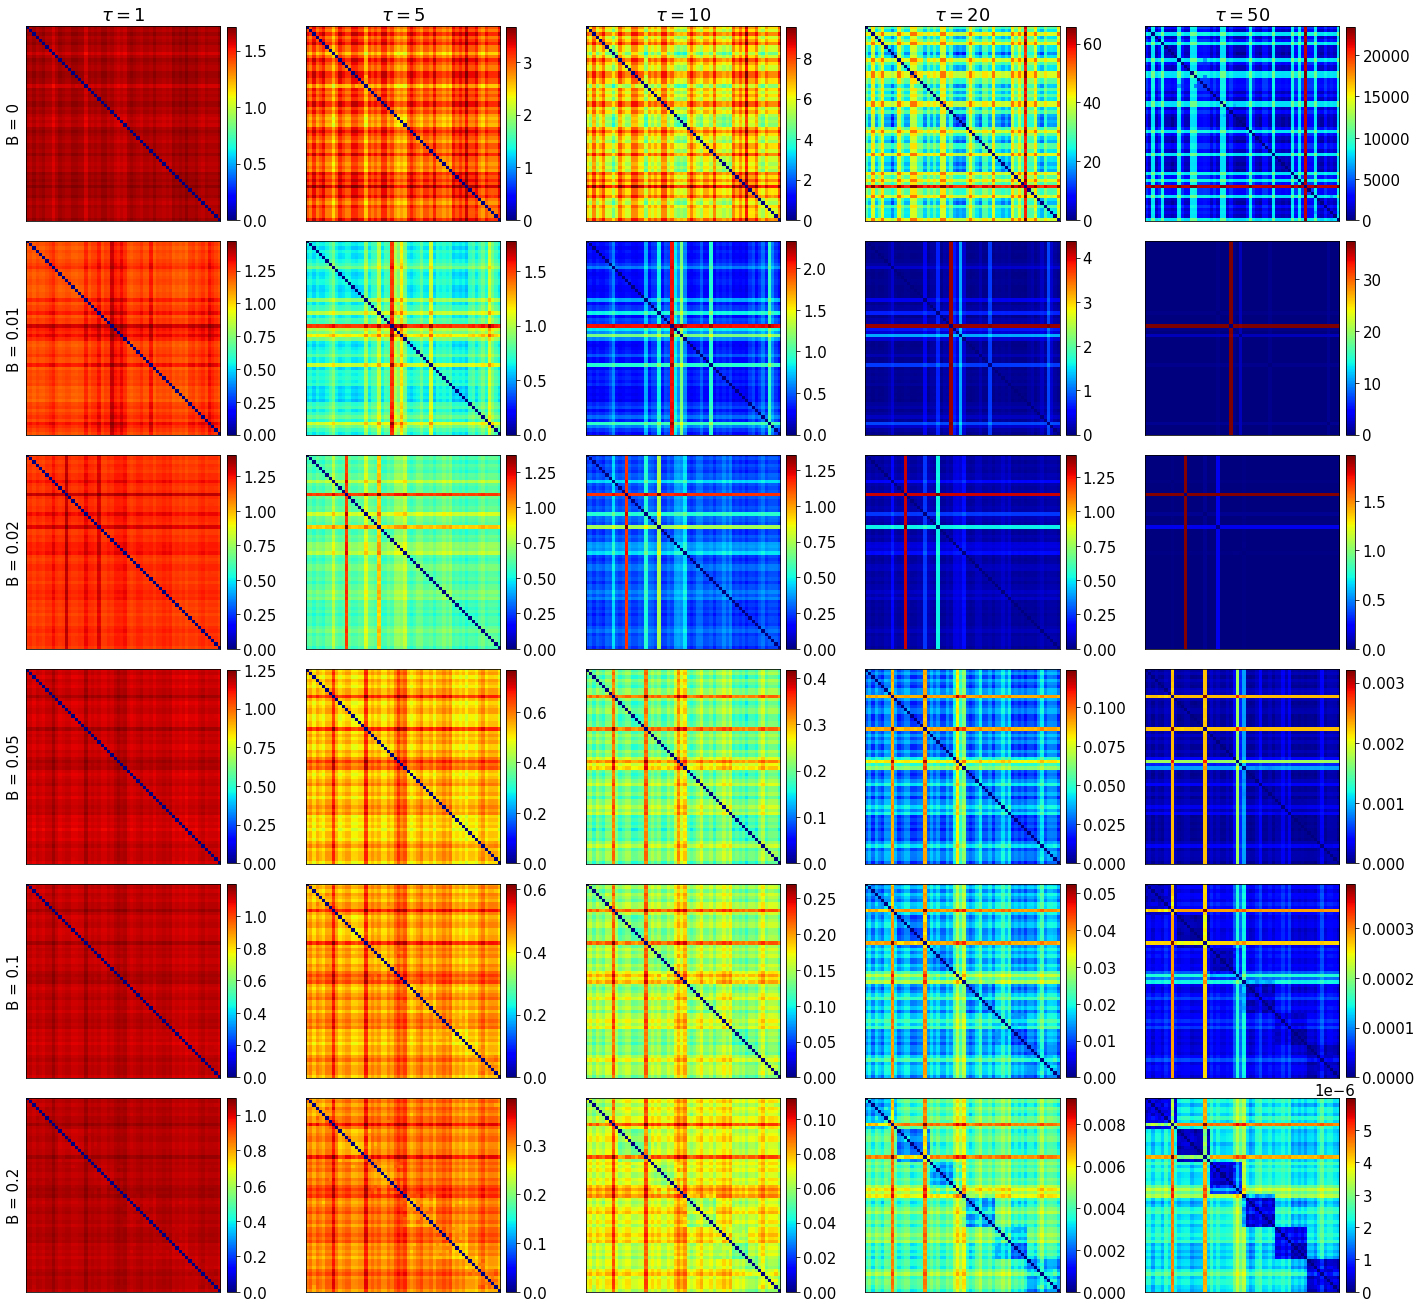

In [77]:
plotter.plot_dist_matrix_evol([tmp[1] for tmp in res_params], string_params, hspace=-0.9)

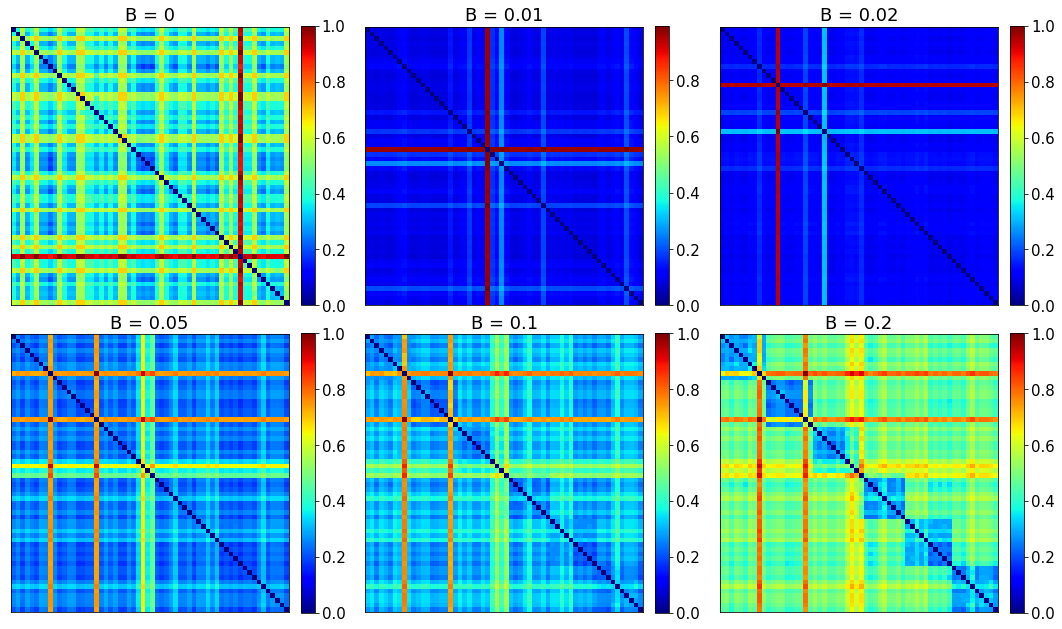

In [78]:
plotter.plot_average_dist_matrix([tmp[1] for tmp in res_params], string_params, hspace=-1.2)

# Hierarchical clustering

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance as ssd

In [26]:
average_diff = get_average_matrix(res_human[1])

In [65]:
Z = linkage(ssd.squareform(average_diff), optimal_ordering=True, method='average')

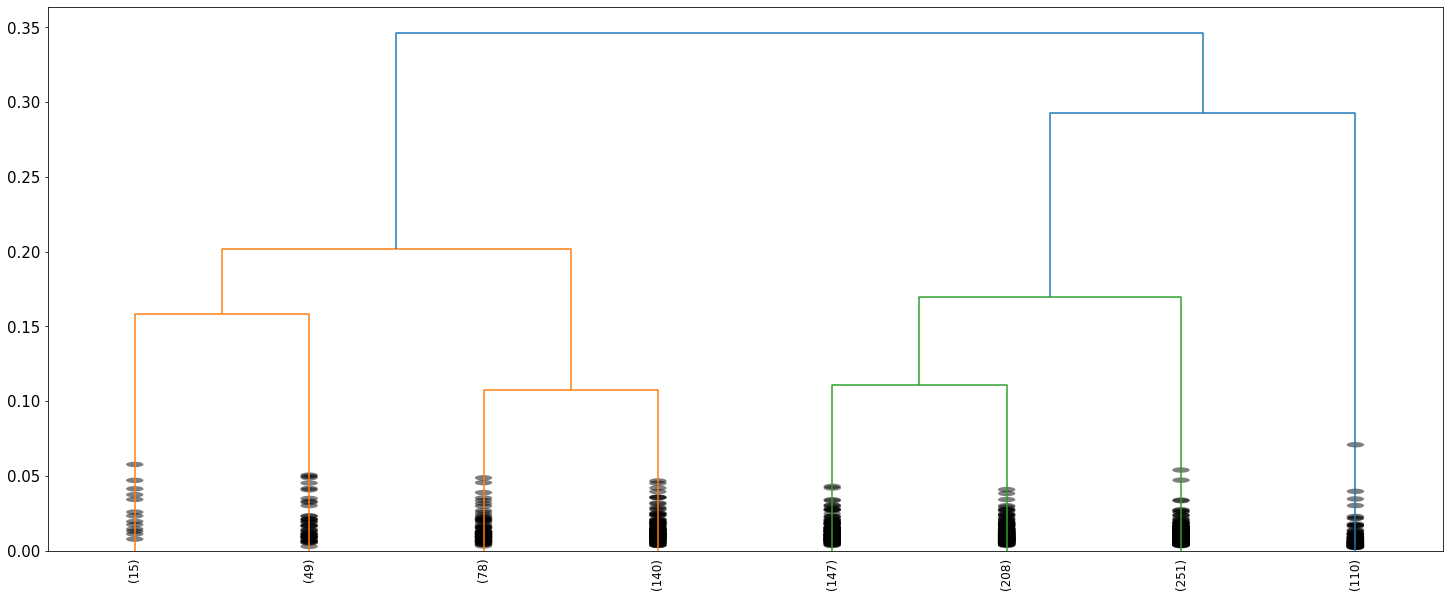

In [69]:
fig = plt.figure(figsize=(25, 10))

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.show()

In [72]:
# vedere qual è il numero migliore di cluster

In [99]:
LL = np.eye(len(connectome)) - connectome / np.sum(connectome, axis=0)[:,None]

In [102]:
np.sum(np.abs(LL))

1996.0